In [1]:
!pip install -U rightmove-webscraper
from rightmove_webscraper import RightmoveData


Requirement already up-to-date: rightmove-webscraper in c:\users\linta.kumar\appdata\local\programs\python\python37\lib\site-packages (1.0.2)
Requirement not upgraded as not directly required: python-dateutil==2.8.0 in c:\users\linta.kumar\appdata\local\programs\python\python37\lib\site-packages (from rightmove-webscraper) (2.8.0)
Requirement not upgraded as not directly required: pandas==1.0.3 in c:\users\linta.kumar\appdata\local\programs\python\python37\lib\site-packages (from rightmove-webscraper) (1.0.3)
Requirement not upgraded as not directly required: pytz==2019.2 in c:\users\linta.kumar\appdata\local\programs\python\python37\lib\site-packages (from rightmove-webscraper) (2019.2)
Requirement not upgraded as not directly required: lxml==4.4.1 in c:\users\linta.kumar\appdata\local\programs\python\python37\lib\site-packages (from rightmove-webscraper) (4.4.1)
Requirement not upgraded as not directly required: urllib3==1.25.6 in c:\users\linta.kumar\appdata\local\programs\python\py

pandas-profiling 2.10.0 has requirement requests>=2.24.0, but you'll have requests 2.22.0 which is incompatible.
matplotlib 3.3.2 has requirement certifi>=2020.06.20, but you'll have certifi 2019.9.11 which is incompatible.
holidays 0.10.4 has requirement convertdate<=2.2.0, but you'll have convertdate 2.3.0 which is incompatible.
You are using pip version 10.0.1, however version 21.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [18]:
import re
import pandas as pd
import numpy as np

In [3]:
url = "https://www.rightmove.co.uk/property-for-sale/find.html?searchType=SALE&locationIdentifier=REGION%5E1114&insId=1&radius=0.5&minPrice=&maxPrice=&minBedrooms=&maxBedrooms=&displayPropertyType=houses&maxDaysSinceAdded=&_includeSSTC=on&sortByPriceDescending=&primaryDisplayPropertyType=&secondaryDisplayPropertyType=&oldDisplayPropertyType=&oldPrimaryDisplayPropertyType=&newHome=&auction=false"
rm = RightmoveData(url)

In [4]:
df = rm.get_results

In [5]:
df.drop(['url', 'agent_url', 'search_date'],axis= 1, inplace = True)

In [6]:
df.head(n=18)

,price,type,address,postcode,number_bedrooms
0,290000.0,3 bedroom terraced house for sale,"Cardigan Gardens, Reading",NaN,3.0
1,3950000.0,8 bedroom detached house for sale,"Dunsden Green, South Oxfordshire, RG4",RG4,8.0
2,1595000.0,5 bedroom link detached house for sale,"Davis Street, Hurst, Reading, Berkshire, RG10",RG10,5.0
3,1500000.0,5 bedroom detached house for sale,ARTS & CRAFTS STYLE HOUSE IN READING UNIVERSIT...,NaN,5.0
4,1500000.0,6 bedroom detached house for sale,"Sandford, Reading",NaN,6.0
5,1475000.0,5 bedroom detached house for sale,"Carters Hill, Arborfield, Reading, Berkshire, RG2",RG2,5.0
6,1400000.0,7 bedroom detached house for sale,"Reading, Berkshire, RG2",RG2,7.0
7,1295000.0,4 bedroom detached house for sale,"Holme Park Farm Lane, Sonning On Thames, Reading",NaN,4.0
8,1275000.0,5 bedroom detached house for sale,"Richmond Road, Caversham, Reading",NaN,5.0
9,1275000.0,5 bedroom detached house for sale,"Richmond Road, Caversham, Reading, RG4",RG4,5.0


In [7]:
df.tail()

,price,type,address,postcode,number_bedrooms
781,149000.0,3 bedroom terraced house for sale,"193 Thirlmere Avenue, Reading, RG30 6XG",RG30,3.0
782,149000.0,3 bedroom terraced house for sale,"Thirlmere Avenue, Tilehurst, Reading, RG30",RG30,3.0
783,130000.0,1 bedroom retirement property for sale,"Milward Court, Reading",NaN,1.0
784,100000.0,Detached house for sale,"London Road, Reading, Berkshire",NaN,NaN
785,363750.0,3 bedroom terraced house for sale,"Harrow Court, Bath Road, Reading, RG1",RG1,3.0


In [8]:
def getTypeOfHouse(type):
    text = type[0].lower()
    text = re.sub(r'^.*?bedroom', '', text)
    return text


In [9]:
"gfdgdg".replace

<function str.replace(old, new, count=-1, /)>

In [10]:
df.type = df.type.apply(lambda x: getTypeOfHouse(x.split('for sale')))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            778 non-null    float64
 1   type             786 non-null    object 
 2   address          786 non-null    object 
 3   postcode         426 non-null    object 
 4   number_bedrooms  783 non-null    float64
dtypes: float64(2), object(3)
memory usage: 30.8+ KB


In [12]:
df.head()

,price,type,address,postcode,number_bedrooms
0,290000.0,terraced house,"Cardigan Gardens, Reading",NaN,3.0
1,3950000.0,detached house,"Dunsden Green, South Oxfordshire, RG4",RG4,8.0
2,1595000.0,link detached house,"Davis Street, Hurst, Reading, Berkshire, RG10",RG10,5.0
3,1500000.0,detached house,ARTS & CRAFTS STYLE HOUSE IN READING UNIVERSIT...,NaN,5.0
4,1500000.0,detached house,"Sandford, Reading",NaN,6.0


In [13]:
df.address.value_counts()

Deardon Way,\r\nShinfield,\r\nRG2                                     11
Church Lane,\r\nReading,\r\nRG7 1HE                                    8
Brookers Hill,\r\nShinfield,\r\nRG2                                    7
Reading, Berkshire, RG2                                                7
Rhodes Close, Winnersh, \r\nWokingham, \r\nBerkshire, \r\nRG41 5SL     7
                                                                      ..
Blandford Road, Reading, RG2                                           1
Pound Lane, Reading                                                    1
Horseshoe Road, Pangbourne, Reading, RG8                               1
Mill Lane, Earley, Reading, Berkshire, RG6                             1
Baslow Road, Winnersh, Wokingham                                       1
Name: address, Length: 637, dtype: int64

In [16]:
def getPostcode(text):

    text = re.findall(r'\b[A-Z]{1,2}[0-9][A-Z0-9]?\b', text)
    print(len(text))
    if len(text) == 0:
        print(np.NaN)
        return (np.NaN)
    else:
        print((str(text[0])))
        return str(text[0])


In [19]:
df.tail(n=10).address.apply(lambda x: getPostcode(x))

1
RG1
1
RG1
0
nan
1
RG2
0
nan
1
RG30
1
RG30
0
nan
0
nan
1
RG1


776     RG1
777     RG1
778     NaN
779     RG2
780     NaN
781    RG30
782    RG30
783     NaN
784     NaN
785     RG1
Name: address, dtype: object

In [170]:
df.drop(['newPostcode'] ,axis = 1 ,inplace = True)

In [20]:
df['newPostcode'] = df.address.apply(lambda x: getPostcode(x))

0
nan
1
RG4
1
RG10
0
nan
0
nan
1
RG2
1
RG2
0
nan
0
nan
1
RG4
1
RG2
1
RG4
1
RG10
1
RG1
0
nan
1
RG1
0
nan
0
nan
1
RG41
0
nan
1
RG2
1
RG2
1
RG2
1
RG41
1
RG8
0
nan
0
nan
1
RG2
0
nan
0
nan
0
nan
1
RG41
0
nan
1
RG1
0
nan
0
nan
0
nan
0
nan
0
nan
1
RG4
0
nan
1
RG1
0
nan
0
nan
1
RG4
1
RG10
1
RG2
1
RG2
1
RG2
1
RG41
0
nan
1
RG30
1
RG41
1
RG41
0
nan
1
RG41
0
nan
1
RG1
1
RG2
1
RG41
1
RG10
0
nan
0
nan
0
nan
1
RG1
0
nan
0
nan
0
nan
0
nan
1
RG4
0
nan
1
RG41
1
RG31
1
RG8
0
nan
0
nan
1
RG41
1
RG6
1
RG4
1
RG41
1
RG1
1
RG2
1
RG4
0
nan
1
RG6
1
RG6
1
RG1
1
RG1
0
nan
1
RG1
1
RG5
0
nan
1
RG7
0
nan
0
nan
1
RG2
1
RG1
0
nan
1
RG5
1
RG30
0
nan
1
RG8
1
RG41
1
RG6
1
RG5
0
nan
1
RG6
0
nan
0
nan
0
nan
0
nan
1
RG31
0
nan
1
RG41
1
RG41
1
RG2
0
nan
1
RG2
1
RG1
1
RG41
1
RG31
1
RG4
0
nan
0
nan
0
nan
0
nan
0
nan
0
nan
1
RG8
0
nan
1
RG8
1
RG2
1
RG41
0
nan
0
nan
0
nan
0
nan
1
RG1
0
nan
0
nan
1
RG8
1
RG2
1
RG2
1
RG41
0
nan
0
nan
0
nan
0
nan
0
nan
1
RG41
1
RG1
0
nan
0
nan
0
nan
1
RG5
1
RG6
0
nan
1
RG6
1
RG6
0
nan
1
RG2
0
nan
0

In [21]:
df.head()

,price,type,address,postcode,number_bedrooms,newPostcode
0,290000.0,terraced house,"Cardigan Gardens, Reading",NaN,3.0,NaN
1,3950000.0,detached house,"Dunsden Green, South Oxfordshire, RG4",RG4,8.0,RG4
2,1595000.0,link detached house,"Davis Street, Hurst, Reading, Berkshire, RG10",RG10,5.0,RG10
3,1500000.0,detached house,ARTS & CRAFTS STYLE HOUSE IN READING UNIVERSIT...,NaN,5.0,NaN
4,1500000.0,detached house,"Sandford, Reading",NaN,6.0,NaN


In [34]:
type(df.newPostcode[0])

float

In [22]:
df.newPostcode.value_counts()

RG2     77
RG30    76
RG1     60
RG6     50
RG41    46
RG31    38
RG5     30
RG4     21
RG7     17
RG8      7
RG10     4
Name: newPostcode, dtype: int64

In [24]:
df.postcode.value_counts()

RG2     77
RG30    76
RG1     60
RG6     50
RG41    46
RG31    38
RG5     30
RG4     21
RG7     17
RG8      7
RG10     4
Name: postcode, dtype: int64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## as you can see they are the same values- we didnot gain any additional info.So dropping newPostcode

In [ ]:
# Let us try to get the postcode values from the address using a package

In [183]:
!pip install geopandas
!pip install geopy

    Complete output from command python setup.py egg_info:
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    
    ----------------------------------------


Command "python setup.py egg_info" failed with error code 1 in C:\Users\Linta.Kumar\AppData\Local\Temp\pip-install-7d5fnvo2\fiona\
You are using pip version 10.0.1, however version 21.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


pandas-profiling 2.10.0 has requirement requests>=2.24.0, but you'll have requests 2.22.0 which is incompatible.
matplotlib 3.3.2 has requirement certifi>=2020.06.20, but you'll have certifi 2019.9.11 which is incompatible.
holidays 0.10.4 has requirement convertdate<=2.2.0, but you'll have convertdate 2.3.0 which is incompatible.
You are using pip version 10.0.1, however version 21.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [35]:
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent='myGeocoder')


In [37]:
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df['location'] = df['address'].apply(geocode)

In [38]:
df['location'] = df.location.apply(lambda x: str(x))

In [39]:
def getGeoPostcode(text):

    text = re.findall(r'\b[A-Z]{1,2}[0-9][A-Z0-9]? [0-9][ABD-HJLNP-UW-Z]{2}\b', text)
    print(len(text))
    if len(text) == 0:
        print(np.nan)
        return np.nan
    else:
        print((str(text[0])))
        return str(text[0])


In [40]:
df['newlocation'] = df.location.apply(lambda x: getGeoPostcode(x))

1
RG1 5QP
0
nan
0
nan
0
nan
1
RG30 1HX
0
nan
0
nan
0
nan
1
RG4 7PP
1
RG4 7PP
0
nan
0
nan
0
nan
0
nan
0
nan
1
RG1 5LH
0
nan
1
RG4 7PP
0
nan
1
RG4 7EY
0
nan
0
nan
1
RG2 7AG
0
nan
0
nan
1
RG4 7QT
1
RG4 8SD
0
nan
0
nan
0
nan
1
RG4 7BL
0
nan
0
nan
0
nan
1
RG4 9AB
0
nan
1
RG30 6EX
0
nan
0
nan
0
nan
1
RG4 6DW
1
RG1 5PH
0
nan
1
RG4 7BD
0
nan
0
nan
1
RG2 7HQ
0
nan
0
nan
1
RG41 5PS
0
nan
0
nan
0
nan
0
nan
1
RG4 8QP
0
nan
1
RG41 5RH
1
RG1 7XS
0
nan
0
nan
0
nan
1
RG8 8BD
1
RG41 5RT
1
RG1 5HB
1
RG1 5BG
1
RG31 5BX
1
RG4 8NJ
0
nan
1
RG4 7HW
1
RG4 6NB
1
RG30 4PU
0
nan
0
nan
0
nan
0
nan
1
RG4 8JZ
0
nan
0
nan
1
RG4 7XQ
1
RG41 5TN
1
RG1 3DP
1
RG2 7AJ
1
RG4 8ST
0
nan
0
nan
0
nan
1
RG1 4DH
1
RG1 3DP
1
RG4 8JZ
1
RG1 4DH
0
nan
1
RG5 4QR
0
nan
0
nan
1
RG4 7BL
1
RG2 9LF
1
RG1 2NF
0
nan
0
nan
1
RG30 4EY
0
nan
1
RG8 7LU
0
nan
0
nan
0
nan
1
RG4 7LS
0
nan
1
RG31 7YE
1
RG41 5PT
0
nan
1
RG31 6ZX
1
RG31 6JH
0
nan
0
nan
0
nan
1
RG2 9LF
1
RG4 8QJ
1
RG2 9RE
1
RG1 6FE
0
nan
0
nan
1
RG4 8QH
0
nan
0
nan
0
nan
1
RG1 5QP
1
R

In [50]:
df.head(n = 10)

,price,type,address,postcode,number_bedrooms,newPostcode,location,newlocation
0,290000.0,terraced house,"Cardigan Gardens, Reading",NaN,3.0,NaN,"Cardigan Gardens, Newtown, Reading, South East...",RG1 5QP
1,3950000.0,detached house,"Dunsden Green, South Oxfordshire, RG4",RG4,8.0,RG4,"Dunsden Green, Oxfordshire, South East, Englan...",NaN
2,1595000.0,link detached house,"Davis Street, Hurst, Reading, Berkshire, RG10",RG10,5.0,RG10,None,NaN
3,1500000.0,detached house,ARTS & CRAFTS STYLE HOUSE IN READING UNIVERSIT...,NaN,5.0,NaN,None,NaN
4,1500000.0,detached house,"Sandford, Reading",NaN,6.0,NaN,"Sandford Court, Dee Park, Reading, South East,...",RG30 1HX
5,1475000.0,detached house,"Carters Hill, Arborfield, Reading, Berkshire, RG2",RG2,5.0,RG2,None,NaN
6,1400000.0,detached house,"Reading, Berkshire, RG2",RG2,7.0,RG2,"Reading, Shinfield, Wokingham, South East, Eng...",NaN
7,1295000.0,detached house,"Holme Park Farm Lane, Sonning On Thames, Reading",NaN,4.0,NaN,None,NaN
8,1275000.0,detached house,"Richmond Road, Caversham, Reading",NaN,5.0,NaN,"Richmond Road, Caversham Heights, Reading, Sou...",RG4 7PP
9,1275000.0,detached house,"Richmond Road, Caversham, Reading, RG4",RG4,5.0,RG4,"Richmond Road, Caversham Heights, Reading, Sou...",RG4 7PP


In [62]:
 df.loc[pd.isnull(df.newPostcode)]

,price,type,address,postcode,number_bedrooms,newPostcode,location,newlocation
0,290000.0,terraced house,"Cardigan Gardens, Reading",NaN,3.0,NaN,"Cardigan Gardens, Newtown, Reading, South East...",RG1 5QP
3,1500000.0,detached house,ARTS & CRAFTS STYLE HOUSE IN READING UNIVERSIT...,NaN,5.0,NaN,None,NaN
4,1500000.0,detached house,"Sandford, Reading",NaN,6.0,NaN,"Sandford Court, Dee Park, Reading, South East,...",RG30 1HX
7,1295000.0,detached house,"Holme Park Farm Lane, Sonning On Thames, Reading",NaN,4.0,NaN,None,NaN
8,1275000.0,detached house,"Richmond Road, Caversham, Reading",NaN,5.0,NaN,"Richmond Road, Caversham Heights, Reading, Sou...",RG4 7PP
...,...,...,...,...,...,...,...,...
768,220000.0,terraced house,"Great Knollys Street, Reading, Berkshire",NaN,2.0,NaN,None,NaN
778,175000.0,semi-detached house,"Stoke Court, Hartland Road, READING",NaN,1.0,NaN,None,NaN
780,155000.0,retirement property,"Headley Road East, Woodley, Reading",NaN,1.0,NaN,None,NaN
783,130000.0,retirement property,"Milward Court, Reading",NaN,1.0,NaN,"Edgar Milward Close, Dee Park, Reading, South ...",RG30 6AA


In [ ]:
# If newPostcode is null, fll ti with values from newlocation column

In [66]:
df.newPostcode =  df.apply(lambda x: x.newlocation if pd.isnull(x.newPostcode) else x.newPostcode, axis=1)

In [67]:
df.newPostcode[0]

'RG1 5QP'

In [70]:
df.isnull().sum()

price                8
type                 0
address              0
postcode           360
number_bedrooms      3
newPostcode        120
location             0
newlocation        379
dtype: int64

In [ ]:
# we can drop postcode and newlocation columns now

In [72]:
df.drop(['postcode','newlocation'], axis = 1, inplace = True)

In [74]:
df.head()

,price,type,address,number_bedrooms,newPostcode,location
0,290000.0,terraced house,"Cardigan Gardens, Reading",3.0,RG1 5QP,"Cardigan Gardens, Newtown, Reading, South East..."
1,3950000.0,detached house,"Dunsden Green, South Oxfordshire, RG4",8.0,RG4,"Dunsden Green, Oxfordshire, South East, Englan..."
2,1595000.0,link detached house,"Davis Street, Hurst, Reading, Berkshire, RG10",5.0,RG10,None
3,1500000.0,detached house,ARTS & CRAFTS STYLE HOUSE IN READING UNIVERSIT...,5.0,NaN,None
4,1500000.0,detached house,"Sandford, Reading",6.0,RG30 1HX,"Sandford Court, Dee Park, Reading, South East,..."


In [77]:
df.address.value_counts()

Deardon Way,\r\nShinfield,\r\nRG2                                     11
Church Lane,\r\nReading,\r\nRG7 1HE                                    8
Brookers Hill,\r\nShinfield,\r\nRG2                                    7
Reading, Berkshire, RG2                                                7
Rhodes Close, Winnersh, \r\nWokingham, \r\nBerkshire, \r\nRG41 5SL     7
                                                                      ..
Blandford Road, Reading, RG2                                           1
Pound Lane, Reading                                                    1
Horseshoe Road, Pangbourne, Reading, RG8                               1
Mill Lane, Earley, Reading, Berkshire, RG6                             1
Baslow Road, Winnersh, Wokingham                                       1
Name: address, Length: 637, dtype: int64

<AxesSubplot:xlabel='count', ylabel='newPostcode'>

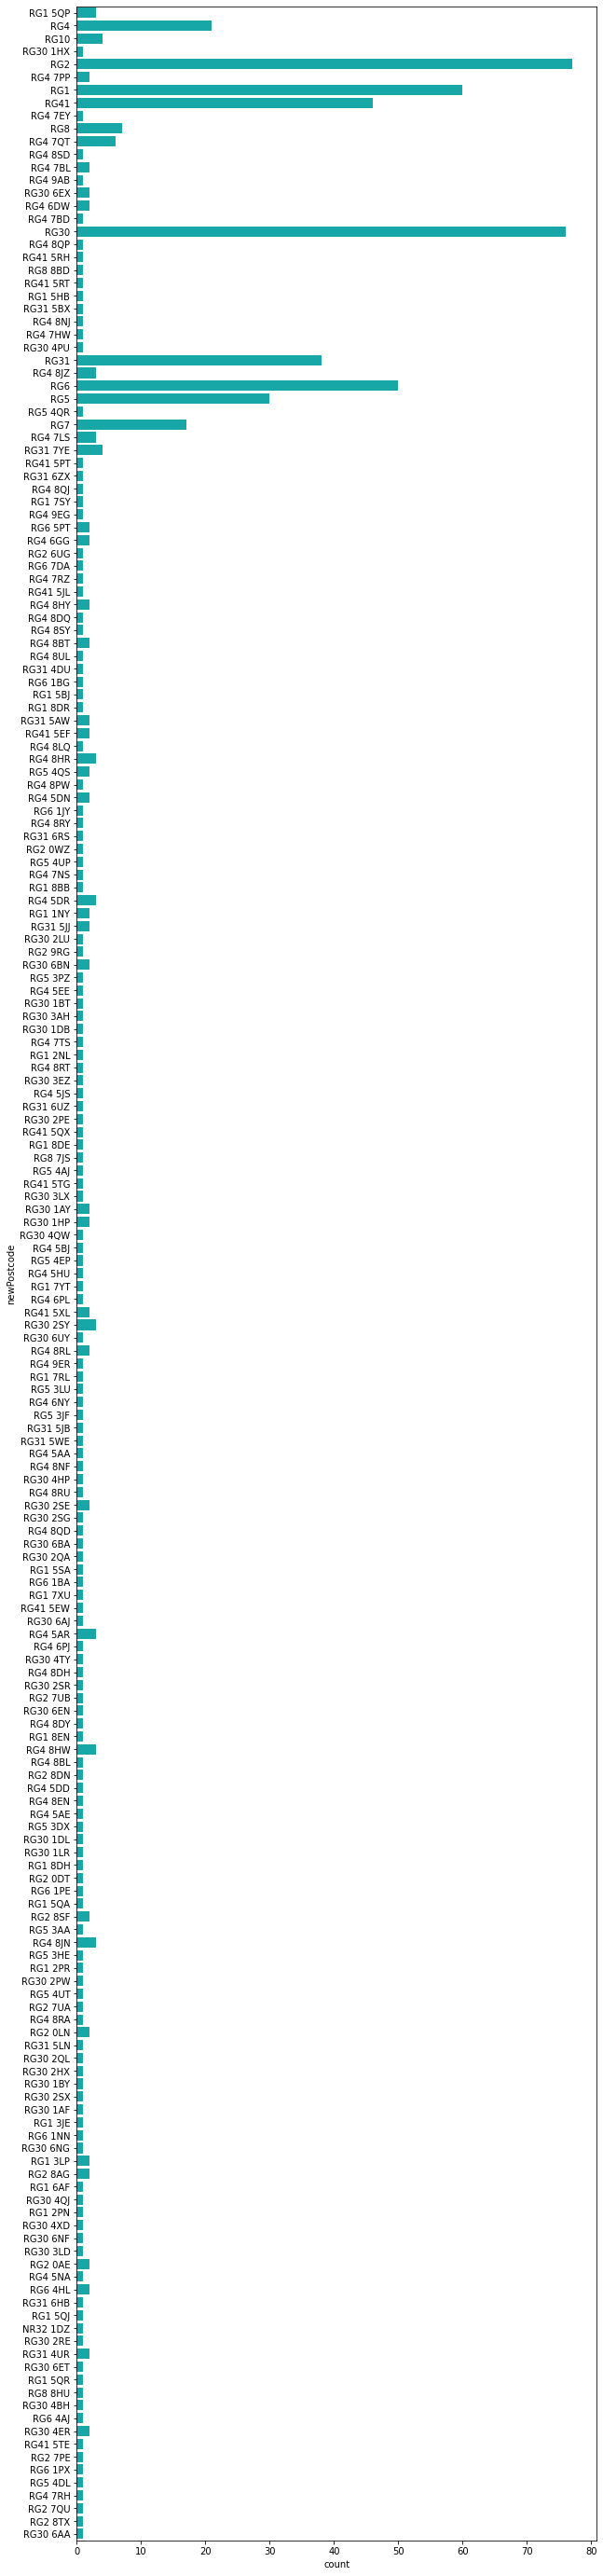

In [84]:
f, ax = plt.subplots(figsize=(10, 50))
sns.countplot(y="newPostcode", data=df, color="c")

In [ ]:
# We can group these postcodes by their first part of postcode eg: RG31 5BX --> RG31

In [114]:
def getFirstPartOfPostcode(postcode):
    if str(postcode) != 'nan':
        return (postcode.split()[0])
    

In [115]:
df.newPostcode = df.apply(lambda x: getFirstPartOfPostcode(x.newPostcode), axis=1)

In [116]:
df.head()

,price,type,address,number_bedrooms,newPostcode,location
0,290000.0,terraced house,"Cardigan Gardens, Reading",3.0,RG1,"Cardigan Gardens, Newtown, Reading, South East..."
1,3950000.0,detached house,"Dunsden Green, South Oxfordshire, RG4",8.0,RG4,"Dunsden Green, Oxfordshire, South East, Englan..."
2,1595000.0,link detached house,"Davis Street, Hurst, Reading, Berkshire, RG10",5.0,RG10,None
3,1500000.0,detached house,ARTS & CRAFTS STYLE HOUSE IN READING UNIVERSIT...,5.0,None,None
4,1500000.0,detached house,"Sandford, Reading",6.0,RG30,"Sandford Court, Dee Park, Reading, South East,..."


<AxesSubplot:xlabel='count', ylabel='newPostcode'>

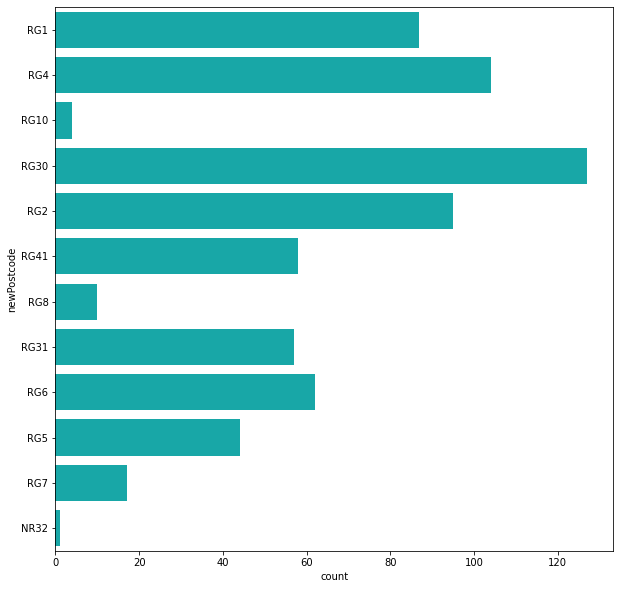

In [119]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y="newPostcode", data=df, color="c")

In [120]:
df.newPostcode.value_counts()

RG30    127
RG4     104
RG2      95
RG1      87
RG6      62
RG41     58
RG31     57
RG5      44
RG7      17
RG8      10
RG10      4
NR32      1
Name: newPostcode, dtype: int64

In [ ]:
# As you see we only have a few categories of postcode now. My intuition is that we can use groupby with type of house to fill missing values in postcode

In [ ]:
# find distribution of types of houses

<AxesSubplot:xlabel='count', ylabel='type'>

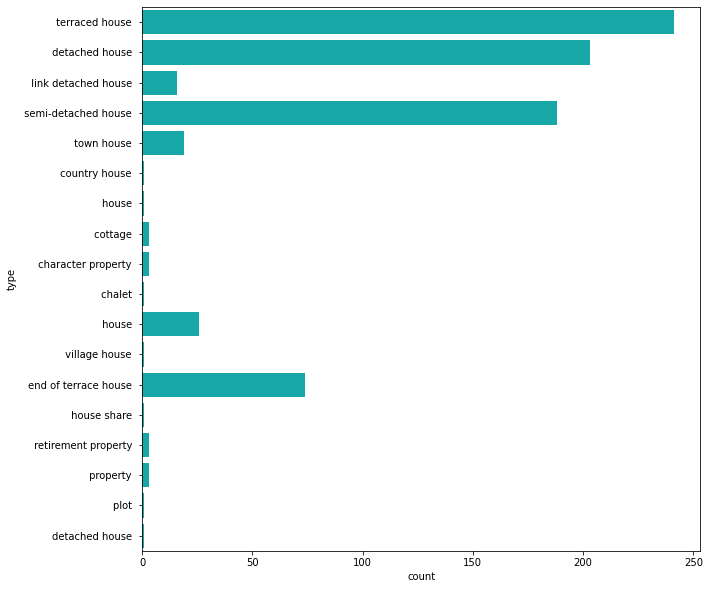

In [121]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y="type", data=df, color="c")

In [218]:
df["type"] = df["type"].apply(lambda x: x.strip()) # remove the leading whitespace fom left 

In [219]:
df["type"].value_counts()

terraced house          241
detached house          204
semi-detached house     188
end of terrace house     74
house                    27
town house               19
link detached house      16
retirement property       3
property                  3
cottage                   3
character property        3
village house             1
plot                      1
house share               1
country house             1
chalet                    1
Name: type, dtype: int64

In [220]:
df["type"] = df["type"].astype('category')
df["type_code"] = df["type"].cat.codes
df.head()

,price,type,address,number_bedrooms,newPostcode,location,type_code,postcode_codes
0,290000.0,terraced house,"Cardigan Gardens, Reading",3.0,RG1,"Cardigan Gardens, Newtown, Reading, South East...",13,1
1,3950000.0,detached house,"Dunsden Green, South Oxfordshire, RG4",8.0,RG4,"Dunsden Green, Oxfordshire, South East, Englan...",4,6
2,1595000.0,link detached house,"Davis Street, Hurst, Reading, Berkshire, RG10",5.0,RG10,None,8,2
3,1500000.0,detached house,ARTS & CRAFTS STYLE HOUSE IN READING UNIVERSIT...,5.0,NaN,None,4,-1
4,1500000.0,detached house,"Sandford, Reading",6.0,RG30,"Sandford Court, Dee Park, Reading, South East,...",4,4


In [169]:
df["newPostcode"] = df["newPostcode"].astype('category')
df["postcode_codes"] = df["newPostcode"].cat.codes
df.head()

,price,type,address,number_bedrooms,newPostcode,location,type_code,postcode_codes
0,290000.0,terraced house,"Cardigan Gardens, Reading",3.0,RG1,"Cardigan Gardens, Newtown, Reading, South East...",13,1
1,3950000.0,detached house,"Dunsden Green, South Oxfordshire, RG4",8.0,RG4,"Dunsden Green, Oxfordshire, South East, Englan...",4,6
2,1595000.0,link detached house,"Davis Street, Hurst, Reading, Berkshire, RG10",5.0,RG10,None,8,2
3,1500000.0,detached house,ARTS & CRAFTS STYLE HOUSE IN READING UNIVERSIT...,5.0,NaN,None,4,-1
4,1500000.0,detached house,"Sandford, Reading",6.0,RG30,"Sandford Court, Dee Park, Reading, South East,...",4,4


In [170]:
df["postcode_codes"].value_counts()

 4     127
-1     120
 6     104
 3      95
 1      87
 9      62
 7      58
 5      57
 8      44
 10     17
 11     10
 2       4
 0       1
Name: postcode_codes, dtype: int64

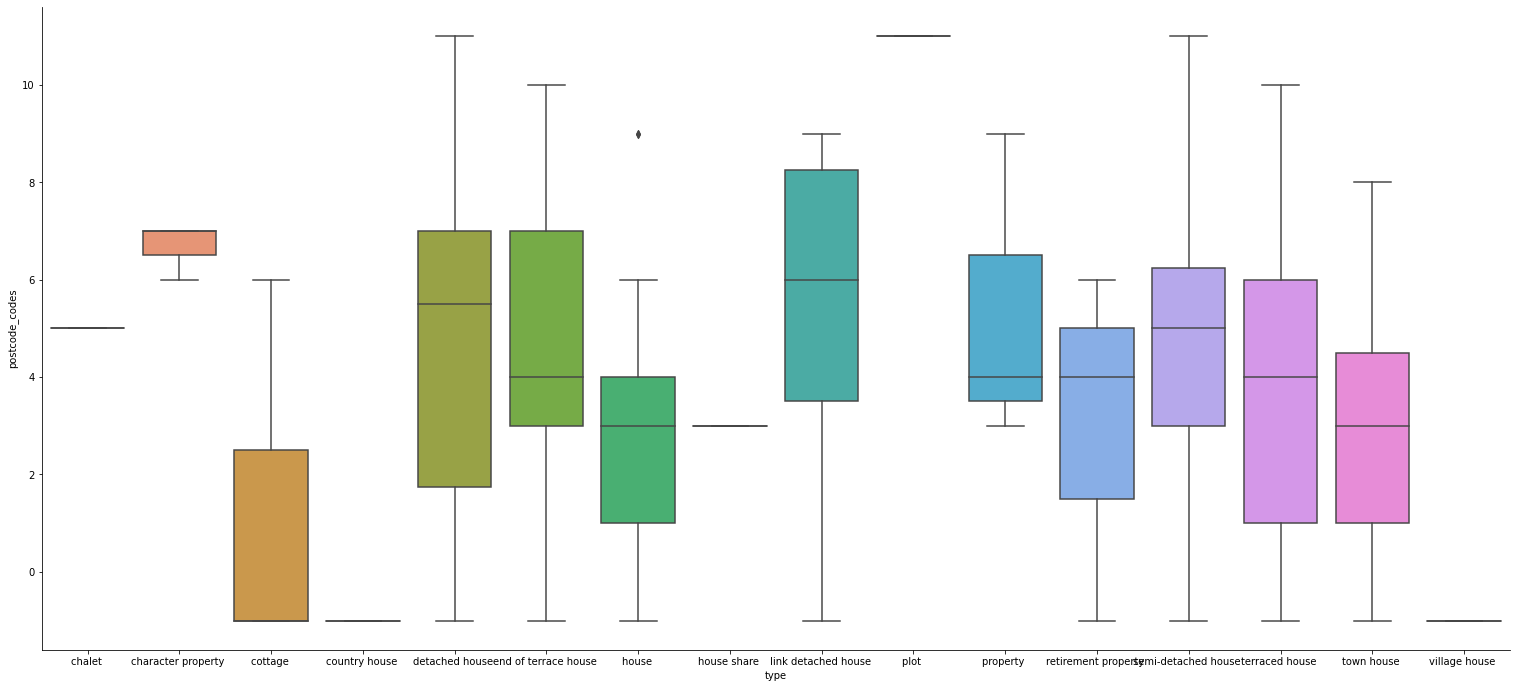

In [174]:

p = sns.catplot(x="type", y="postcode_codes", kind="box", data=df)
p.fig.set_figwidth(25)
p.fig.set_figheight(10)

In [213]:
 df.groupby(['type'])['postcode_codes'].apply(lambda x: x.value_counts().index[0])

type
chalet                    5
character property        7
cottage                  -1
country house            -1
detached house           -1
end of terrace house      4
house                     4
house share               3
link detached house       9
plot                     11
property                  3
retirement property       6
semi-detached house       3
terraced house            1
town house                1
village house            -1
Name: postcode_codes, dtype: int64

In [224]:
df.loc[df.postcode_codes == -1 and df.type.isin(['house share' , 'property', 'semi-detached house'])] 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [235]:
df.loc[df.type=='terraced house']

,price,type,address,number_bedrooms,newPostcode,location,type_code,postcode_codes
0,290000.0,terraced house,"Cardigan Gardens, Reading",3.0,RG1,"Cardigan Gardens, Newtown, Reading, South East...",13,1
25,500000.0,terraced house,"Hemdean Road, Reading",5.0,RG4,"Hemdean Road, Caversham, Reading, South East, ...",13,6
50,294000.0,terraced house,"Eldon Place, Reading, Berkshire",2.0,NaN,None,13,-1
125,290000.0,terraced house,"Cardigan Gardens, Reading",3.0,RG1,"Cardigan Gardens, Newtown, Reading, South East...",13,1
126,600000.0,terraced house,"Jesse Terrace, Reading",4.0,RG1,"Jesse Terrace, Coley, Reading, South East, Eng...",13,1
...,...,...,...,...,...,...,...,...
774,203000.0,terraced house,"Jersey Drive, Wokingham, Berkshire, RG41",2.0,RG41,None,13,7
776,190000.0,terraced house,"Riversdale Court, Reading, RG1",1.0,RG1,"Riversdale Court, Newtown, Reading, South East...",13,1
781,149000.0,terraced house,"193 Thirlmere Avenue, Reading, RG30 6XG",3.0,RG30,"193, Thirlmere Avenue, Norcot, Reading, South ...",13,4
782,149000.0,terraced house,"Thirlmere Avenue, Tilehurst, Reading, RG30",3.0,RG30,"Thirlmere Avenue, Norcot, Reading, South East,...",13,4


In [216]:
df.type[0]

str

In [ ]:
# start filling missing postcodes

c:\users\linta.kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

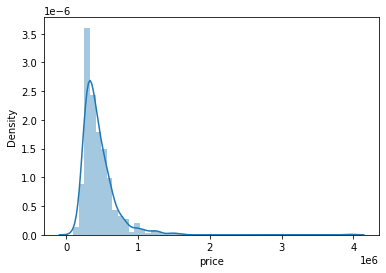

In [240]:
sns.distplot(df['price'], hist = True)

In [ ]:
# as we can see data is positively skewed

c:\users\linta.kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

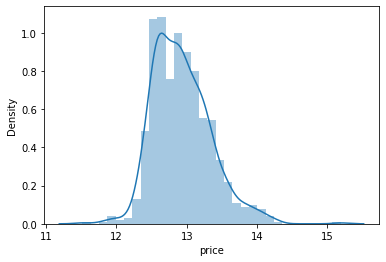

In [241]:
sns.distplot(np.log(df['price']), hist = True)

In [ ]:
# this looks more like a normal distribution

In [ ]:
df.price = np.log(df.price)

<AxesSubplot:xlabel='number_bedrooms', ylabel='count'>

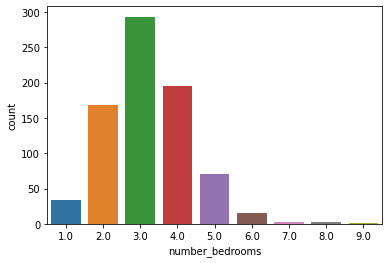

In [248]:
sns.countplot(x = df['number_bedrooms'])

<AxesSubplot:xlabel='number_bedrooms', ylabel='price'>

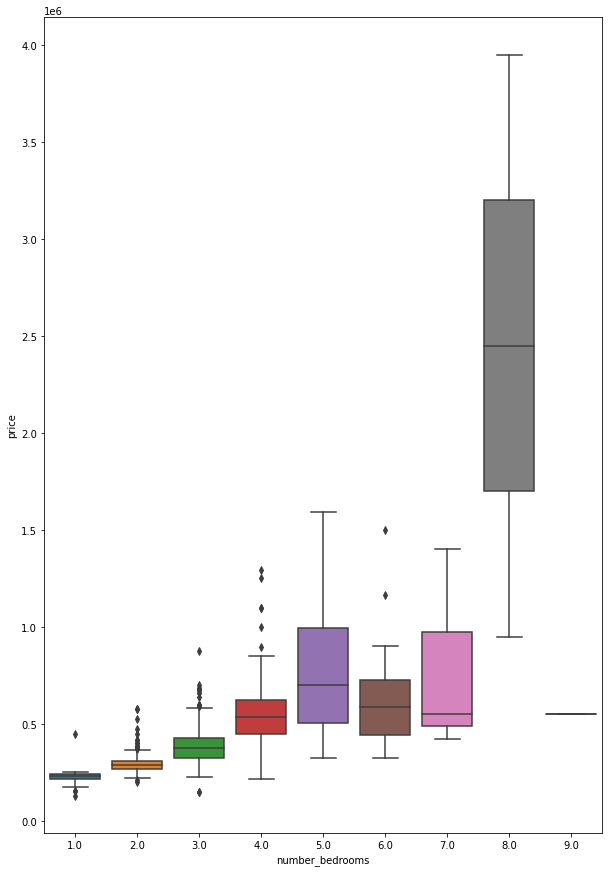

In [263]:
f, ax = plt.subplots(figsize=(10, 15))
sns.boxplot(x = df['number_bedrooms'], y = df.price)

In [ ]:
# As you can see there are some ouliers here, but Im not dropping them as it could be due to area of house and some other factors which we are unaware of

In [265]:
df.loc[df['number_bedrooms'] == 9.0]

,price,type,address,number_bedrooms,newPostcode,location,type_code,postcode_codes
170,550000.0,terraced house,"London Road, Reading",9.0,RG1,"London Road, Spring Gardens, Coley, Reading, S...",13,1


In [266]:
# it is a bit strange that the house with r bedrooms has such a low price! So Im going to remove this house.

In [269]:
df.drop(170, inplace = True)

In [270]:
df.loc[df['number_bedrooms'] == 9.0] # we have dropped the column of house with 9 bedrooms

,price,type,address,number_bedrooms,newPostcode,location,type_code,postcode_codes
